<a href="https://colab.research.google.com/github/james-monahan/Code-school-notebooks/blob/main/Hackathon-1/hackathon1_func.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install api-offres-emploi

In [ ]:
from offres_emploi import Api
client = Api(client_id=" ", 
             client_secret=" ")

In [ ]:
from offres_emploi.utils import dt_to_str_iso
import datetime
from datetime import timedelta
import time
from offres_emploi.utils import filters_to_df
import pandas as pd
import numpy as no
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [ ]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [ ]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
#default keywords
default = ["Analyst","Data analyst", "Analyste décisionnel", "Analyste de gestion informatique", 
          'Analyste-programmeur / Analyste-programmeuse informatique', 
          'Analyste concepteur / conceptrice informatique', 'Analyste logistique', 'sql', 'python', 'data scientist', 'machine learning']

In [ ]:
def get_jobs(keywords = default, days_since = 90):
  vals = ["0-149", "150-299", "300-449", "450-599", "600-749", "750-899", "900-1049"]
  frames = []

  for title in default:
    for val in vals:
      try:
        start_dt = datetime.datetime.today() - timedelta(days=days_since)
        end_dt = datetime.datetime.today()
        params = {
            "range": val,
            "motsCles": title,
            'minCreationDate': dt_to_str_iso(start_dt),
            'maxCreationDate': dt_to_str_iso(end_dt)
        }

        search_on_big_data = client.search(params=params)
        filters = search_on_big_data['filtresPossibles']
        results =  search_on_big_data['resultats']
        content_range = search_on_big_data['Content-Range']
        df = pd.DataFrame(results)
        frames.append(df)
        time.sleep(3)



      except AttributeError or HTTPError:
        print("Variable x is not defined")
        break
  df = pd.concat(frames)

  map_cities = {'75': 'Paris', '13':	'Marseille', '69':	'Lyon','31':	'Toulouse', '06': 'Nice',
  '44':	'Nantes', '34':	'Montpellier', '67':	'Strasbourg', '33':	'Bordeaux', '59':	'Lille', '35':	'Rennes',
  '51':	'Reims', '42':	'Saint-Étienne', '83':	'Toulon', '76':	'Le Havre', '38':	'Grenoble', '21':	'Dijon',
  '49':	'Angers', '30':	'Nîmes', '974': 'Saint-Denis', '69':	'Villeurbanne', '63':	'Clermont-Ferrand',
  '72':	'Le Mans', '29':	'Brest', '37':	'Tours', '80':	'Amiens', '87':	'Limoges',
  '74':	'Annecy', '66':	'Perpignan'
  #'13':	'Aix-en-Provence' 
  }

  results_df = df.copy()
  results_df = results_df[['typeContrat', 'appellationlibelle', 'intitule', 'langues', 'lieuTravail', 'natureContrat', 'typeContrat']]
  results_df = results_df.fillna(0, axis=0)
  results_df['lieuTravail'] = results_df.agg(dict(lieuTravail=lambda x: x.get('libelle')))
  results_df['langues'] = results_df['langues'].apply(lambda x: x[0]['libelle'] if len(x) > 0 else None)
  results_df['department'] = results_df['lieuTravail'].apply(lambda x: x.split()[0])
  results_df['city']= results_df['department'].map(map_cities)

  results_df = results_df[results_df['department'].apply(lambda x: x in map_cities.keys())]

  results_df['department'] = results_df['department'].str.replace('06', '6')

  return df, results_df

  results_df['langues'].apply(lambda x: x[0]['libelle'] if len(x) > 0 else None)



In [ ]:
df, results_df = get_jobs(keywords = default, days_since = 90)

Making request with params {'range': '0-149', 'motsCles': 'Analyst', 'minCreationDate': '2020-08-22T11:46:48Z', 'maxCreationDate': '2020-11-20T11:46:48Z'}
Token is expired. Requesting new token
Now requesting token
Making request with params {'range': '150-299', 'motsCles': 'Analyst', 'minCreationDate': '2020-08-22T11:47:54Z', 'maxCreationDate': '2020-11-20T11:47:54Z'}
Variable x is not defined
Making request with params {'range': '0-149', 'motsCles': 'Data analyst', 'minCreationDate': '2020-08-22T11:47:54Z', 'maxCreationDate': '2020-11-20T11:47:54Z'}
Making request with params {'range': '150-299', 'motsCles': 'Data analyst', 'minCreationDate': '2020-08-22T11:47:57Z', 'maxCreationDate': '2020-11-20T11:47:57Z'}
Variable x is not defined
Making request with params {'range': '0-149', 'motsCles': 'Analyste décisionnel', 'minCreationDate': '2020-08-22T11:47:58Z', 'maxCreationDate': '2020-11-20T11:47:58Z'}
Making request with params {'range': '150-299', 'motsCles': 'Analyste décisionnel', 'm

In [ ]:
#save and download just in case
results_df.to_csv('results.csv')
df.to_csv('all_data.csv')

In [ ]:
results_df.head()

,typeContrat,appellationlibelle,intitule,langues,lieuTravail,natureContrat,typeContrat,department,city
0,CDI,Data analyst,Data Analyst (H/F),Anglais Très bon Exigé,59 - LILLE,Contrat travail,CDI,59,Lille
1,CDI,Analyste décisionnel - Business Intelligence,CAP FINANCE / HUMANESSENCE: BUSINESS ANALYST B...,None,06 - ANTIBES,Contrat travail,CDI,6,Nice
2,CDI,Analyste décisionnel - Business Intelligence,Business analyst Fircosoft H/F,None,75 - PARIS 01,Contrat travail,CDI,75,Paris
3,CDI,Chef de projet informatique,Chef de Projet / Business Analyst Senior Sales...,None,69 - LYON 01,Contrat travail,CDI,69,Villeurbanne
4,CDI,Data analyst,Data analyst (H/F),None,74 - ANNECY,Contrat travail,CDI,74,Annecy


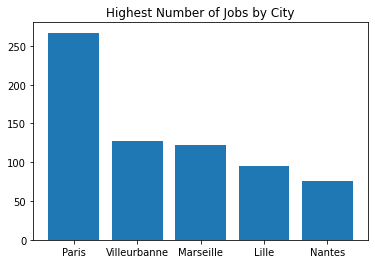

In [ ]:
#top 5
plt.bar(results_df['city'].value_counts().nlargest(5).index, results_df['department'].value_counts().nlargest(5))
plt.title('Highest Number of Jobs by City')
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



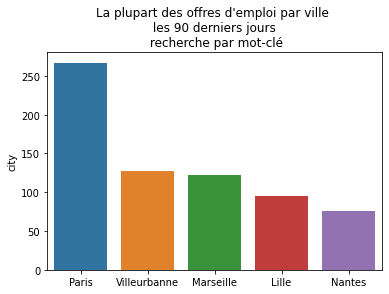

In [ ]:
sns.barplot(results_df['city'].value_counts().nlargest(5).index, results_df['city'].value_counts().nlargest(5))
plt.title("La plupart des offres d'emploi par ville \n les 90 derniers jours \n recherche par mot-clé")
plt.show()

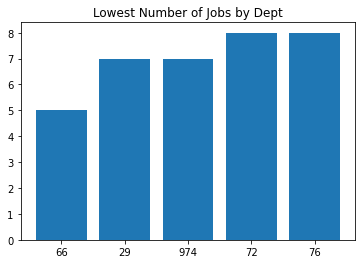

In [ ]:
#bottom 5
plt.bar(results_df['department'].value_counts().sort_values().index[:5], results_df['department'].value_counts().sort_values()[:5])
plt.title('Lowest Number of Jobs by Dept')
plt.show()

##Get Data

In [ ]:
id = '1nU8eDONGcEv8-SVzTtP2Ur0lnMvcFgRe'
downloaded = drive.CreateFile({'id': '1nU8eDONGcEv8-SVzTtP2Ur0lnMvcFgRe'})
downloaded.GetContentFile('ResMetBE20.xlsx')

df_2020 = pd.read_excel('ResMetBE20.xlsx', sheet_name=1) 

id = '1IeupK9-F6jaKieC6d-jkTs2evdJKIx0A'
downloaded = drive.CreateFile({'id': '1IeupK9-F6jaKieC6d-jkTs2evdJKIx0A'})
downloaded.GetContentFile('ResMetBE19.xlsx')

df_2019 = pd.read_excel('ResMetBE19.xlsx', sheet_name=1) 

id = '1hyIzvvrKDZcvskiGIDlSkUUCNpf4RpJ2'
downloaded = drive.CreateFile({'id': '1hyIzvvrKDZcvskiGIDlSkUUCNpf4RpJ2'})
downloaded.GetContentFile('ResMetBE18.xlsx')

df_2018 = pd.read_excel('ResMetBE18.xlsx', sheet_name=1) 

##sample keywords:  
Artistes, Graphistes, Cuisiniers, Juristes  
  
#met = number project of recruitment

In [ ]:
results_df.head()

,typeContrat,appellationlibelle,intitule,langues,lieuTravail,natureContrat,typeContrat,department,city
0,CDI,Data analyst,Data Analyst (H/F),Anglais Très bon Exigé,59 - LILLE,Contrat travail,CDI,59,Lille
1,CDI,Analyste décisionnel - Business Intelligence,CAP FINANCE / HUMANESSENCE: BUSINESS ANALYST B...,None,06 - ANTIBES,Contrat travail,CDI,6,Nice
2,CDI,Analyste décisionnel - Business Intelligence,Business analyst Fircosoft H/F,None,75 - PARIS 01,Contrat travail,CDI,75,Paris
3,CDI,Chef de projet informatique,Chef de Projet / Business Analyst Senior Sales...,None,69 - LYON 01,Contrat travail,CDI,69,Villeurbanne
4,CDI,Data analyst,Data analyst (H/F),None,74 - ANNECY,Contrat travail,CDI,74,Annecy


In [ ]:
keyword = 'informatique'


def Pole_recruit(keyword = keyword, df_merge=results_df):
  df_Pole = pd.concat([df_2020, df_2019, df_2018])
  df_2019['Dept'] = df_2019['Dept'].str.replace('06', '6')
  df_2020['Dept'] = df_2020['Dept'].str.replace('06', '6')


  df_Pole = df_Pole.dropna(axis=1)

  map_cities = {'75': 'Paris', '13':	'Marseille', '69':	'Lyon','31':	'Toulouse', '6':	'Nice',
  '44':	'Nantes', '34':	'Montpellier', '67':	'Strasbourg', '33':	'Bordeaux', '59':	'Lille', '35':	'Rennes',
  '51':	'Reims', '42':	'Saint-Étienne', '83':	'Toulon', '76':	'Le Havre', '38':	'Grenoble', '21':	'Dijon',
  '49':	'Angers', '30':	'Nîmes', '974': 'Saint-Denis', '69':	'Villeurbanne', '63':	'Clermont-Ferrand',
  '72':	'Le Mans', '29':	'Brest', '37':	'Tours', '80':	'Amiens', '87':	'Limoges',
  '74':	'Annecy', '66':	'Perpignan'
  #'13':	'Aix-en-Provence' 
  }
  #just needed depts
  df_2018['Dept'] = df_2018['Dept'].astype('string')
  df_Pole = df_Pole[df_Pole['Dept'].apply(lambda x: x in map_cities.keys())]

  #keyword search
  df_Pole = df_Pole[df_Pole['nommetier'].apply(lambda x: keyword in x)]

  #convert vals to int
  df_Pole['met'] = pd.to_numeric(df_Pole['met'], errors='coerce', downcast='integer').fillna(0)

  #join cities, but hold off and take on join might be better
  #df_Pole['city_join']= df_Pole['Dept'].map(map_cities)

  #roc
  df_roc = df_Pole.groupby(['annee', 'Dept'])['met'].sum().unstack().pct_change()
  df_roc = df_roc[df_roc.index == 2020].stack().to_frame()
  df_roc = df_roc.reset_index().drop('annee', axis=1).rename(columns={"Dept": "Dept", 0: "ROC_Proj_Recruit"})

  #sum
  df_sum = df_Pole.groupby(['annee', 'Dept'])['met'].sum().unstack()
  df_sum = df_sum[df_sum.index == 2020].stack().to_frame()
  df_sum = df_sum.reset_index().drop('annee', axis=1).rename(columns={"Dept": "Dept", 0: "SUM_Proj_Recruit"})

  #english_sought
  df_anglais = results_df.groupby('department')['langues'].count().to_frame()
  df_anglais = df_anglais.reset_index()
  df_anglais.columns=['Dept', 'English_Sought']

  df_Pole = pd.merge(df_roc, df_sum, on='Dept')

  #prepare to merge
  jobs_avail_df = results_df.groupby('department').count()
  jobs_avail_df = jobs_avail_df.reset_index()[['department', 'typeContrat']]
  jobs_avail_df.columns=['Dept', 'Nom_Jobs', 'useless']
  jobs_avail_df = jobs_avail_df.drop('useless', axis=1)

  #

  df_Pole = pd.merge(df_Pole, jobs_avail_df, on='Dept')
  df_Pole = pd.merge(df_Pole, df_anglais, on='Dept')

 
  return df_Pole

In [ ]:
df_Pole = Pole_recruit(keyword = keyword)

In [ ]:
  map_cities = {'75': 'Paris', '13':	'Marseille', '69':	'Lyon','31':	'Toulouse', '6':	'Nice',
  '44':	'Nantes', '34':	'Montpellier', '67':	'Strasbourg', '33':	'Bordeaux', '59':	'Lille', '35':	'Rennes',
  '51':	'Reims', '42':	'Saint-Étienne', '83':	'Toulon', '76':	'Le Havre', '38':	'Grenoble', '21':	'Dijon',
  '49':	'Angers', '30':	'Nîmes', '974': 'Saint-Denis', '69':	'Villeurbanne', '63':	'Clermont-Ferrand',
  '72':	'Le Mans', '29':	'Brest', '37':	'Tours', '80':	'Amiens', '87':	'Limoges',
  '74':	'Annecy', '66':	'Perpignan'
  #'13':	'Aix-en-Provence' 
  }
df_Pole['city'] = df_Pole['Dept'].map(map_cities)

In [ ]:
sns.barplot(results_df['city'].value_counts().nlargest(5).index, results_df['city'].value_counts().nlargest(5))
plt.title('Highest Number of Jobs by City \n Past 90 days \n By Keyword')
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



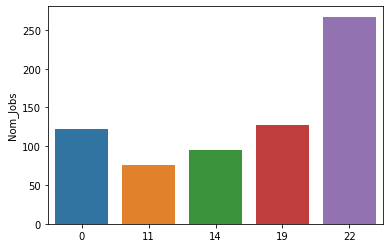

In [ ]:
sns.barplot(df_Pole['Nom_Jobs'].nlargest(5).index, df_Pole['Nom_Jobs'].nlargest(5))

In [ ]:
idx = df_Pole['Nom_Jobs'].nlargest(5).index
df_Pole.iloc[idx]

,Dept,ROC_Proj_Recruit,SUM_Proj_Recruit,Nom_Jobs,English_Sought,city
22,75,-0.052343,16928.0,267,19,Paris
19,69,0.063317,5206.0,128,9,Villeurbanne
0,13,0.264943,3132.0,122,12,Marseille
14,59,0.066130,5030.0,95,6,Lille
11,44,0.096832,4293.0,76,6,Nantes


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



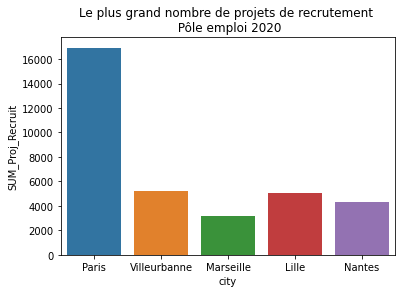

In [ ]:
sns.barplot(df_Pole.iloc[idx]['city'], df_Pole.iloc[idx]['SUM_Proj_Recruit'] )
plt.title('Le plus grand nombre de projets de recrutement \n Pôle emploi 2020')
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



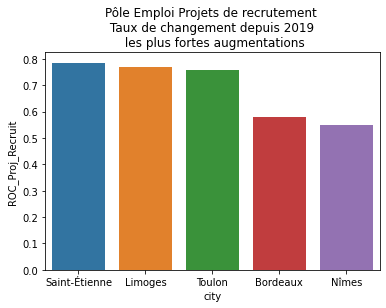

In [ ]:
idx = df_Pole['ROC_Proj_Recruit'].nlargest(5).index
df_Pole.iloc[idx]

sns.barplot(df_Pole.iloc[idx]['city'], df_Pole.iloc[idx]['ROC_Proj_Recruit'] )
plt.title("Pôle Emploi Projets de recrutement \n Taux de changement depuis 2019 \n les plus fortes augmentations")
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



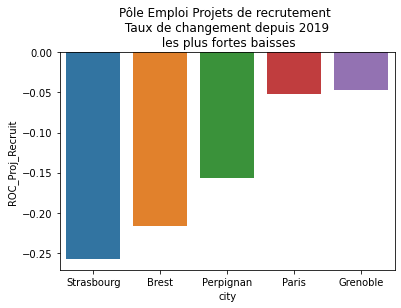

In [ ]:
idx = df_Pole['ROC_Proj_Recruit'].sort_values()[:5].index
df_Pole.iloc[idx]

sns.barplot(df_Pole.iloc[idx]['city'], df_Pole.iloc[idx]['ROC_Proj_Recruit'] )
plt.title("Pôle Emploi Projets de recrutement \n Taux de changement depuis 2019 \n les plus fortes baisses")
plt.show()

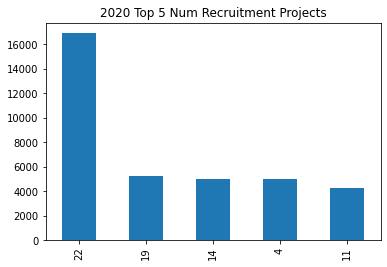

In [ ]:
df_Pole['SUM_Proj_Recruit'].nlargest(5).plot(kind='bar')
plt.title('2020 Top 5 Num Recruitment Projects')
plt.show()

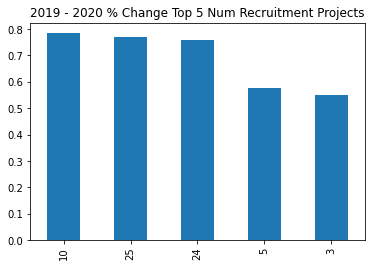

In [ ]:
df_Pole['ROC_Proj_Recruit'].nlargest(5).plot(kind='bar')
plt.title('2019 - 2020 % Change Top 5 Num Recruitment Projects')
plt.show()

In [ ]:
df_Pole.to_csv('2020_jobs_recruit_per_dist.csv')